<a href="https://colab.research.google.com/github/benjaminbeilharz/Perception-Action-Notebooks/blob/main/Bayesian_Models_in_PyMC3_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np 
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns 
print(f"Running on PyMC3 v{pm.__version__}")

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
RANDOM_SEED = np.random.seed(42)

#exercises are taken from 
 # Lee Wagenmakers Cognitive Modeling 

Running on PyMC3 v4.1.4


You can look up the distributions on their [website](https://docs.pymc.io/en/stable/api/distributions/continuous.html)

some examples of distributions:  
`pm.Normal('normal', mu = ... , sigma = ...)`  
`pm.Beta('beta', alpha = ..., beta = ...)`  
`pm.Binomial("binomial", n = ..,  p = ..., observed = ...)`  

some useful functions:  
`az.plot_posterior(trace)`  
`pm.sample_posterior_predictive`  
`pm.sample_prior_predictive`

# Warmup: 

**Match the following statements (numbers) to the distributions (letters)**

### Statements

1) This distribution over parameters captures what we know about the psychological variables having updated the prior information with the evidence provided by data.

2) This distribution captures our initial assumptions or state of knowledge about the psychological variables they represent.

3) This distribution tells us what data to expect, given our model and our current state of knowledge. It is a distribution over data, and gives the relative probability of different observable outcomes before any data have been seen.

4) This distribution tells us what data to expect, given the same model we started with, but with a current state of knowledge that has been updated by the observed data. Again, ______ is a distribution over data, and gives the relative probability of different observable outcomes after data have been seen.


**** 
### Distributions

A) prior predictive distribution

B) posterior predictive distribution

C) prior distribution over parameters

D) posterior distribution


**** 

### Your Solution 
1. D
2. C
3. A
4. B

# Problem 1: Your First PyMC3 Model: Inferring a rate (example from the lecture)

Suppose you are given a coin and you observe a sequence of coin tosses and you want to know whether the coin is fair. The goal of inference in the graphical model will be to determine the rate parameter $\theta$, having observed $k$ heads in $n$ tosses. 

The analysis start swith the prior assumption that all possible rates between 0 and 1 are equally likely. This corresponds to the uniform prior distribution θ ∼ Uniform(0,1) , which can equivalently be written in terms of a beta distribution as θ ∼ Beta(1, 1) 


![image](https://drive.google.com/uc?export=view&id=1iIFMD5hdGZEvmmsxnTzZ_3x8A2QJiWty)



## Exercises 

**Exercise 1.0** Implement the coin toss model based on the graphical model. Draw varying amount of samples from your prior predictive distribution, what does the prior tell you about the fairness of the coin?
  * Hint: You can look up the distributions here: https://docs.pymc.io/en/stable/api/distributions/continuous.html  
  * Hint: You do not need to explicitly have n as a node
  * Hint: Use the 'observed' keyword to condition on your observed data (important for later exercises)
  * Hint: you will need to use PyMC3 distributions (use the python help(function_name)) to check for parameters 

**Exercise 1.1** Carefully consider the posterior distribution for θ given **k = 5** successes out of **n = 10** trials. Based on a visual impression, what is your estimate of the probability that the rate θ is higher than 0.4 but smaller than 0.6? How did you arrive at your estimate?

**Exercise 1.2** Consider again the posterior distribution for θ given **k = 5** successes out of **n = 10** trials. Based on a visual impression, what is your estimate of how much more likely it is that the rate θ is approx. equal to 0.5 rather than 0.7? How did you arrive at your estimate?

**Exercise 1.3** Alter the data to **k = 50** and **n = 100**, and compare the posterior for the rate θ to the original with **k = 5** and **n = 10**.

**Exercise 1.4** For one of the **k = 50**, **n = 100** and **k = 5**, **n = 10** cases just considered, re-run the analyses with fewer samples (e.g., 10 times less) by changing the samples variable.

**Exercise 1.5** Alter the data to **k = 99** and **n = 100**, and comment on the shape of the posterior for the rate θ.

**Exercise 1.6** Alter the data to **k = 0** and **n = 1**, and comment on what this demonstrates about the Bayesian approach.

## Your Solution
**Exercise 1.0**  

**Exercise 1.1**  

**Exercise 1.2**  

**Exercise 1.3**  

**Exercise 1.4**  

**Exercise 1.5**  

**Exercise 1.6**  

In [60]:
# Data (change here for the different exercises and rerun the inference for different cases)
k = np.array([5])
n = np.array([10])

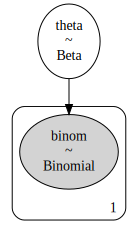

In [61]:
# Building the model 
coin_model = pm.Model()

with coin_model: 
  #Exercise 1.0 Implement the above graphical model in PyMc3
  theta = pm.Beta('theta', 1, 1)
  k_obs = pm.Binomial('binom', n=n, p=theta, observed=k)

#Visualizing your model (hint: there will be no extra node for n)
pm.model_graph.model_to_graphviz(model=coin_model)

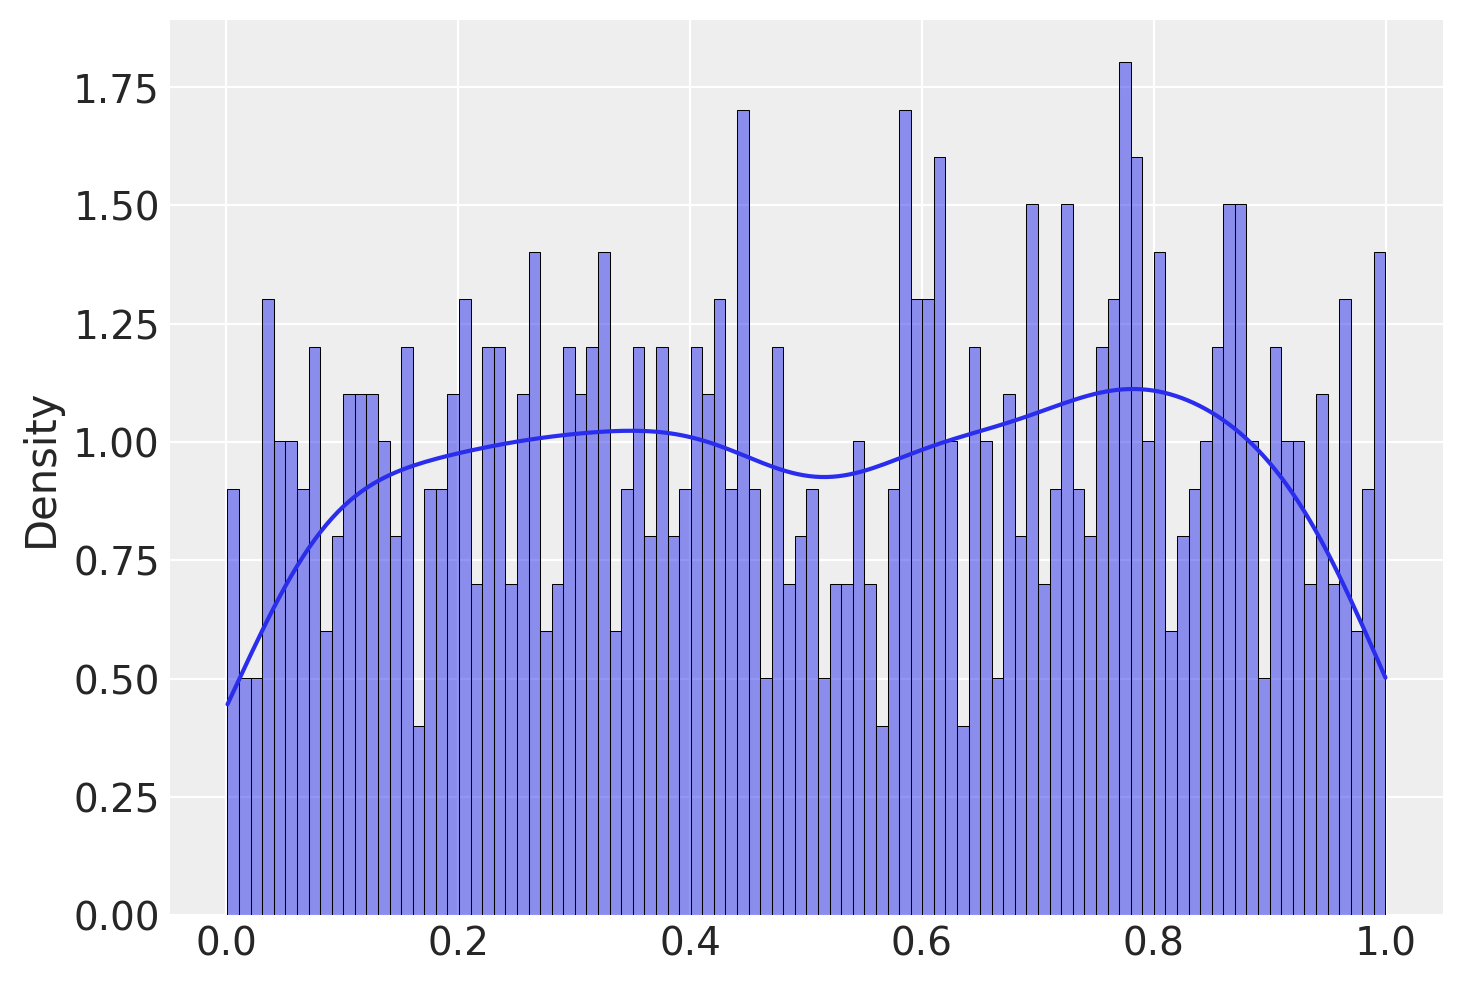

In [62]:
# Visualizing the Prior Predictive Distribution 
with coin_model:
  #draw samples from the prior 
  prior_predictive = pm.sample_prior_predictive(samples=1000, random_seed=RANDOM_SEED)


sns.histplot(prior_predictive.prior['theta'][0], kde = True, stat = 'density', bins = 100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36fe973c50>,
      dtype=object)

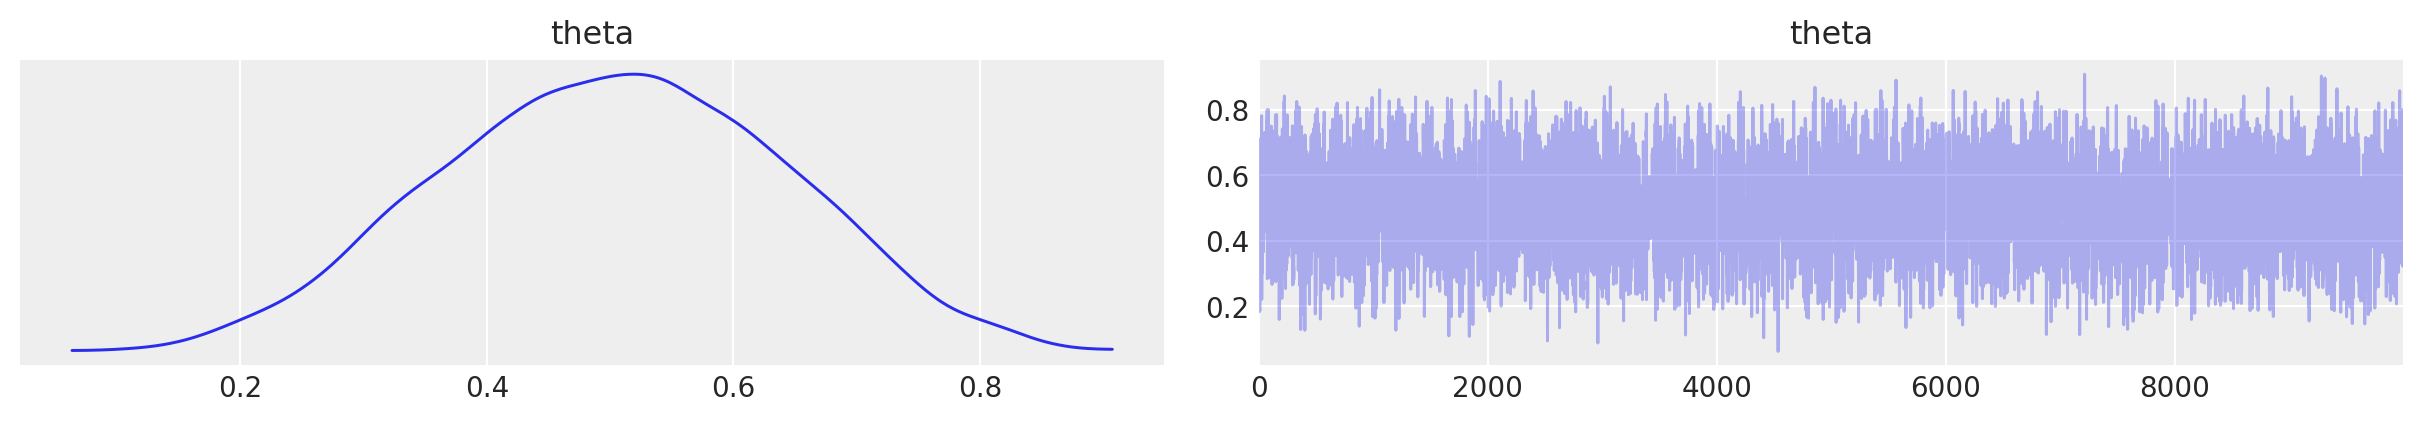

In [63]:
#inference step 
with coin_model:
  idata1 = pm.sample(10000, chains=1) #number of samples (change the sample variable here)

az.plot_trace(idata1, var_names=["theta"])

In [64]:
#compute the MAP
map_estimate = pm.find_MAP(model=coin_model)
print(f'Theta MAP: {map_estimate["theta"]}')

#Question:
  # what is the map estimate and what does it say about the fairness of the coin?


Theta MAP: 0.5


Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.502,0.138,0.251,0.76,0.002,0.002,4133.088,6735.591,NaN


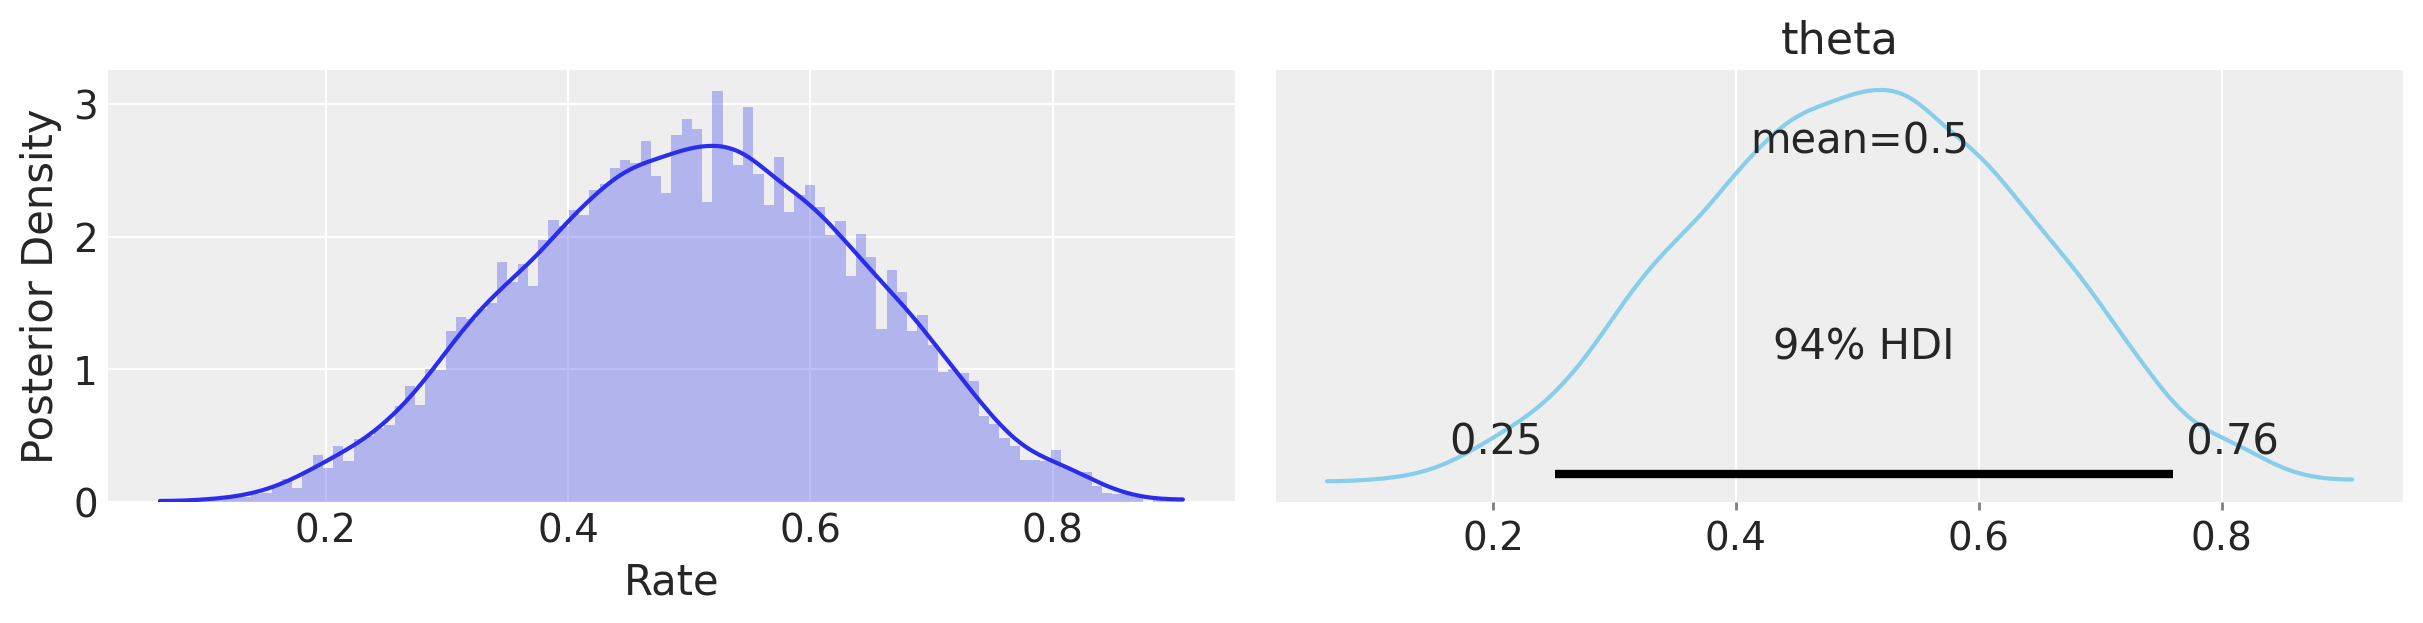

In [65]:
_, axes = plt.subplots(1, 2, figsize=(12, 3))

az.plot_kde(idata1.posterior["theta"][0].values, ax=axes[0])
axes[0].hist(idata1.posterior["theta"][0].values, bins=100, density=1, alpha=0.3)
axes[0].set_xlabel("Rate")
axes[0].set_ylabel("Posterior Density")

az.plot_posterior(idata1, var_names=["theta"], ax=axes[1], color="#87ceeb")

az.summary(
    idata1, var_names=["theta"], round_to=3
)  

[Text(0.5, 0, 'k')]

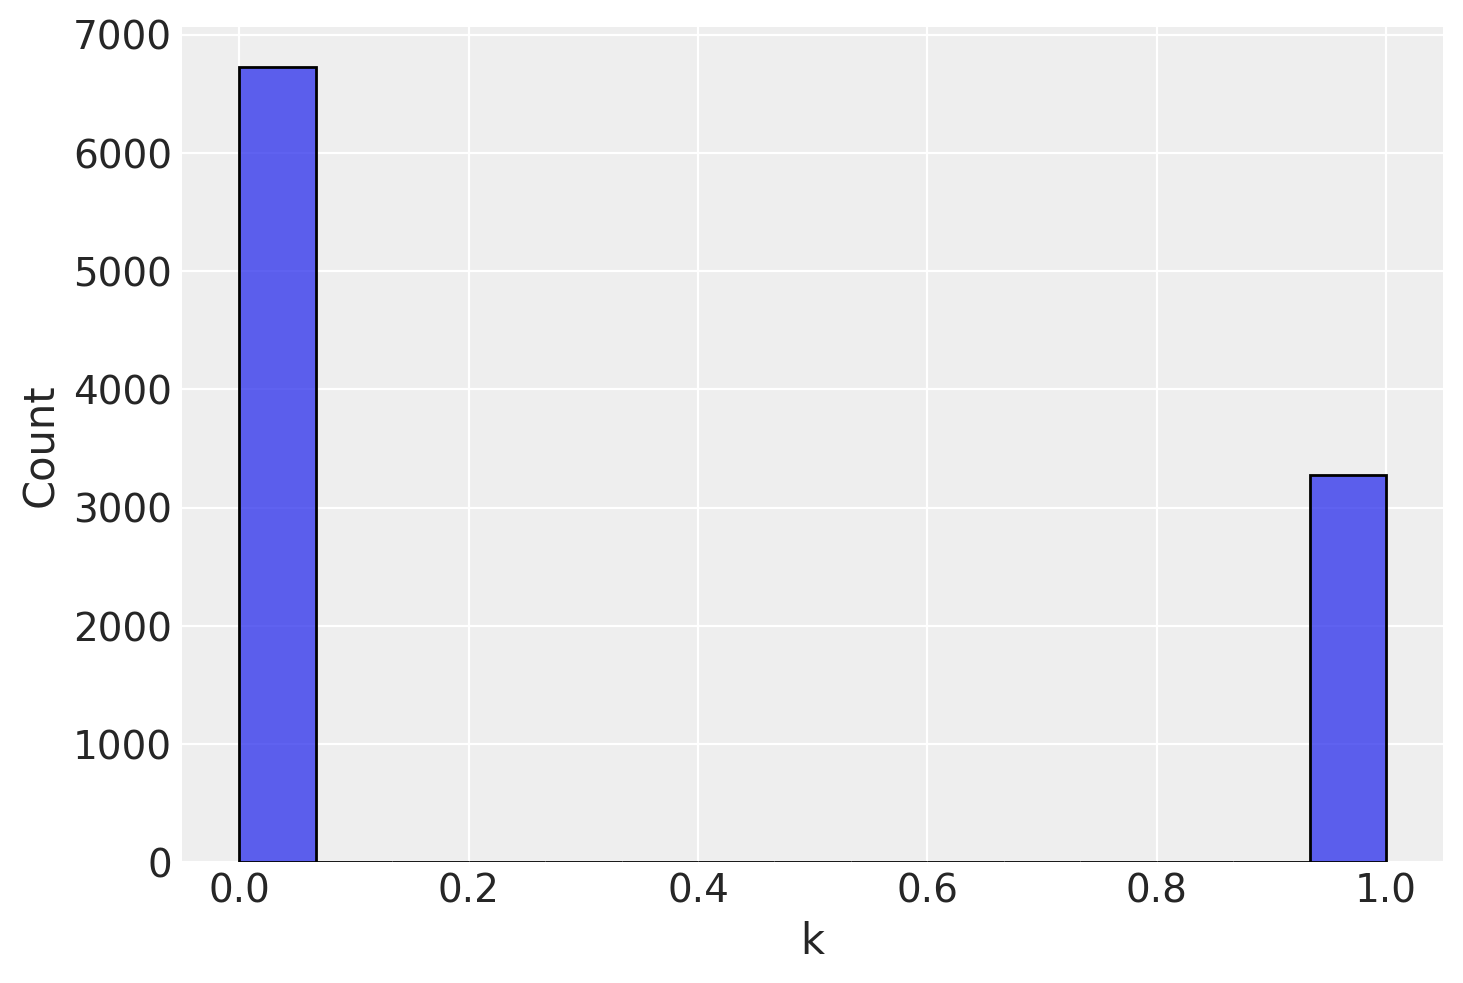

In [52]:
#sampling from the posterior predictive
with coin_model:
  pm.sample_posterior_predictive(
    idata1,
    extend_inferencedata=True
  )

ax = sns.histplot(x=idata1.posterior_predictive['binom'].values.flatten())
ax.set(
    xlabel='k'
)

# Problem 2: The seven scientist problem

Seven scientists with wildly-differing experimental skills all make a measurement of the same quantity. They get the answers x = {−27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056}. Intuitively, it seems clear that the first two scientists are pretty inept measurers, and that the true value of the quantity is probably just a bit below 10. The main problem is to find the posterior distribution over the measured quantity, telling us what we can infer from the measurement. A secondary problem is to infer something about the measurement skills of the seven scientists.


The graphical model for one way of solving this problem is shown in the Figure below. The assumption is that all the scientists have measurements that follow a Gaussian distribution, but with different standard deviations. However, because they are all measuring the same quantity, each Gaussian has the same mean, and it is just the standard deviation that differs.


![image](https://drive.google.com/uc?export=view&id=1x3KNeH8E2XxxkKX6t4kAzn_HXrfPODFx)


###Exercises:


**Exercise 2.0** Implement the model from the graphical model above in PyMC3
* Hint 1: use pm.Deterministic to compute $\sigma_i$ from $\lambda_i$
* Hint 2: use the shape parameter to draw multiple lambda (one for each of the scientists)
* Hint 3: Use the 'observed' keyword to condition on your observed data

**Exercise 2.1** Draw posterior samples, and reach conclusions about the value of the measured quantity, and about the accuracies of the seven scientists.

**Exercise 2.2** Change the graphical model above to use a uniform prior over the precisions. Experiment with the effect the upper bound of this uniform prior has on inference.


**Exercise 2.1**  


**Exercise 2.2** 

In [91]:
## Generating the data 
x = np.array([-27.020,3.570,8.191,9.898,9.603,9.945,10.056])
n = len(x)

In [115]:
seven_scientist_model = pm.Model()

with seven_scientist_model:
  #Exercise 2.0 implement the model from the graphical model above 
  mu = pm.Normal('mu', 0., 1e-3)
  lam = pm.Gamma('lambda', 1e-3, 1e-3, shape=(n))
  sigma = pm.Deterministic('sigma', 1 / np.sqrt(lam))
  x_i = pm.Normal('x', mu, sigma, observed=x)
  

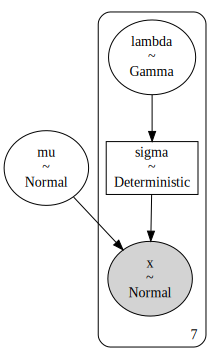

In [116]:
pm.model_graph.model_to_graphviz(seven_scientist_model)

In [56]:
# perform inference
with seven_scientist_model:
  #step = pm.Metropolis()
  idata2 = pm.sample(2000, tune=2000)

In [57]:
#exploring the data 
az.summary(idata2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.000,0.001,-0.002,0.002,0.000,0.000,3483.0,2620.0,1.0
lambda,14.803,4.915,7.993,23.562,0.097,0.077,3313.0,2543.0,1.0
sigma,0.269,0.038,0.198,0.340,0.001,0.000,3313.0,2543.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36f6e0d3d0>],
      dtype=object)

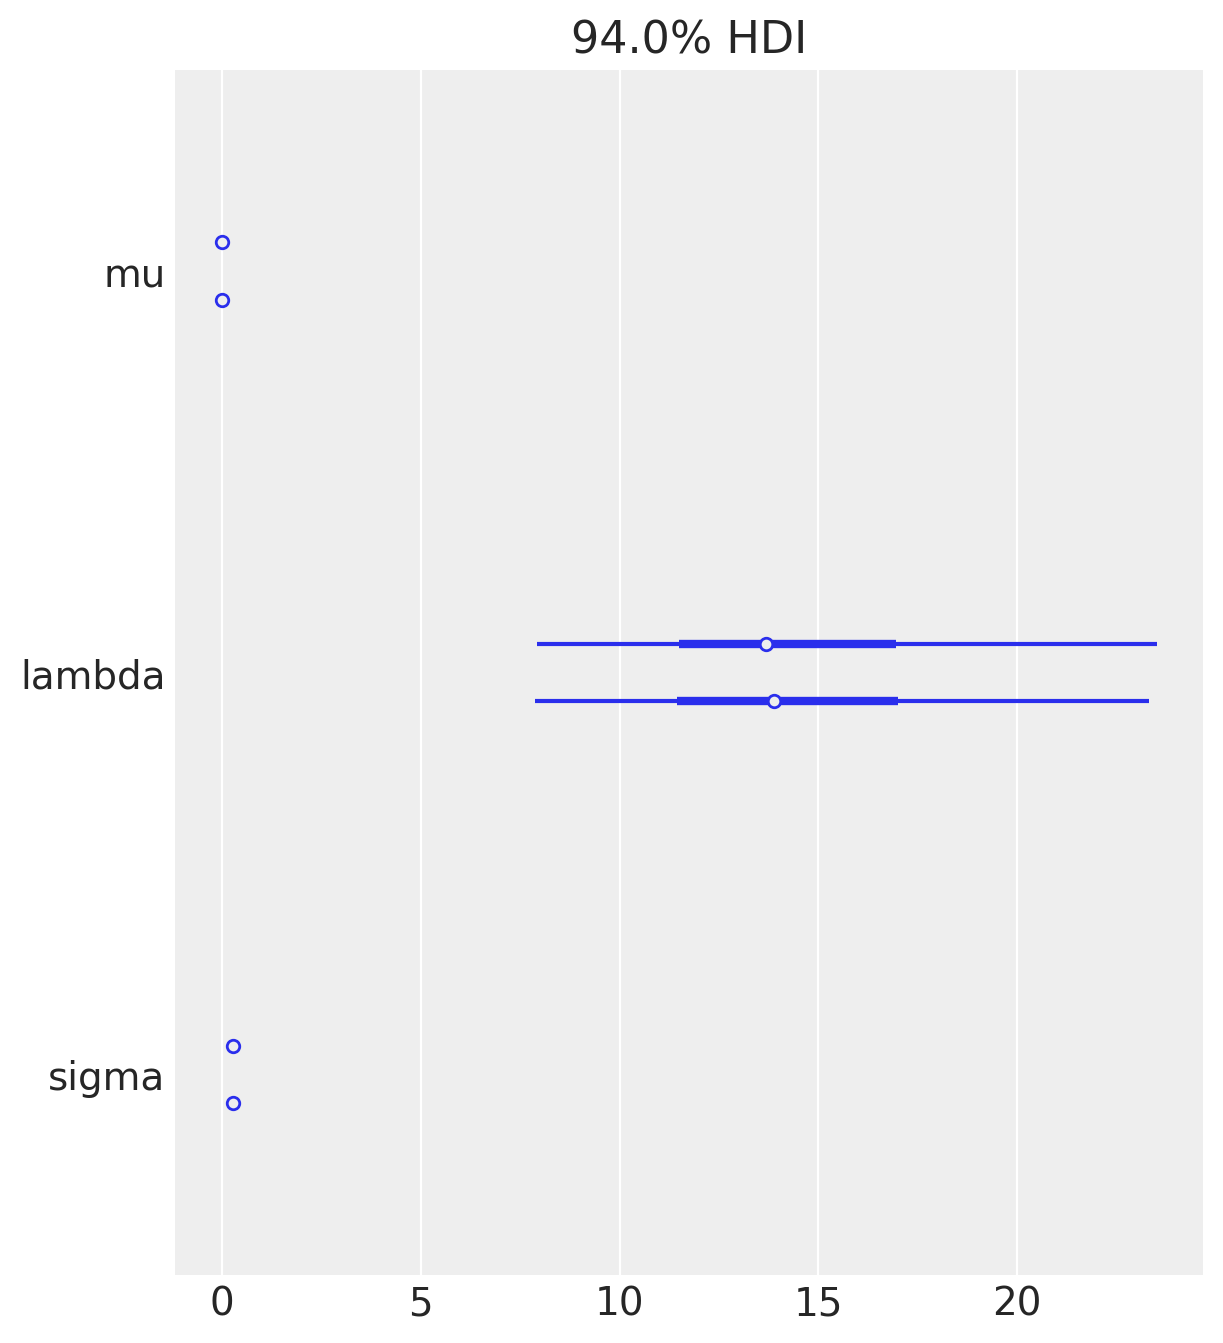

In [58]:
az.plot_forest(idata2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36fe53c390>,
      dtype=object)

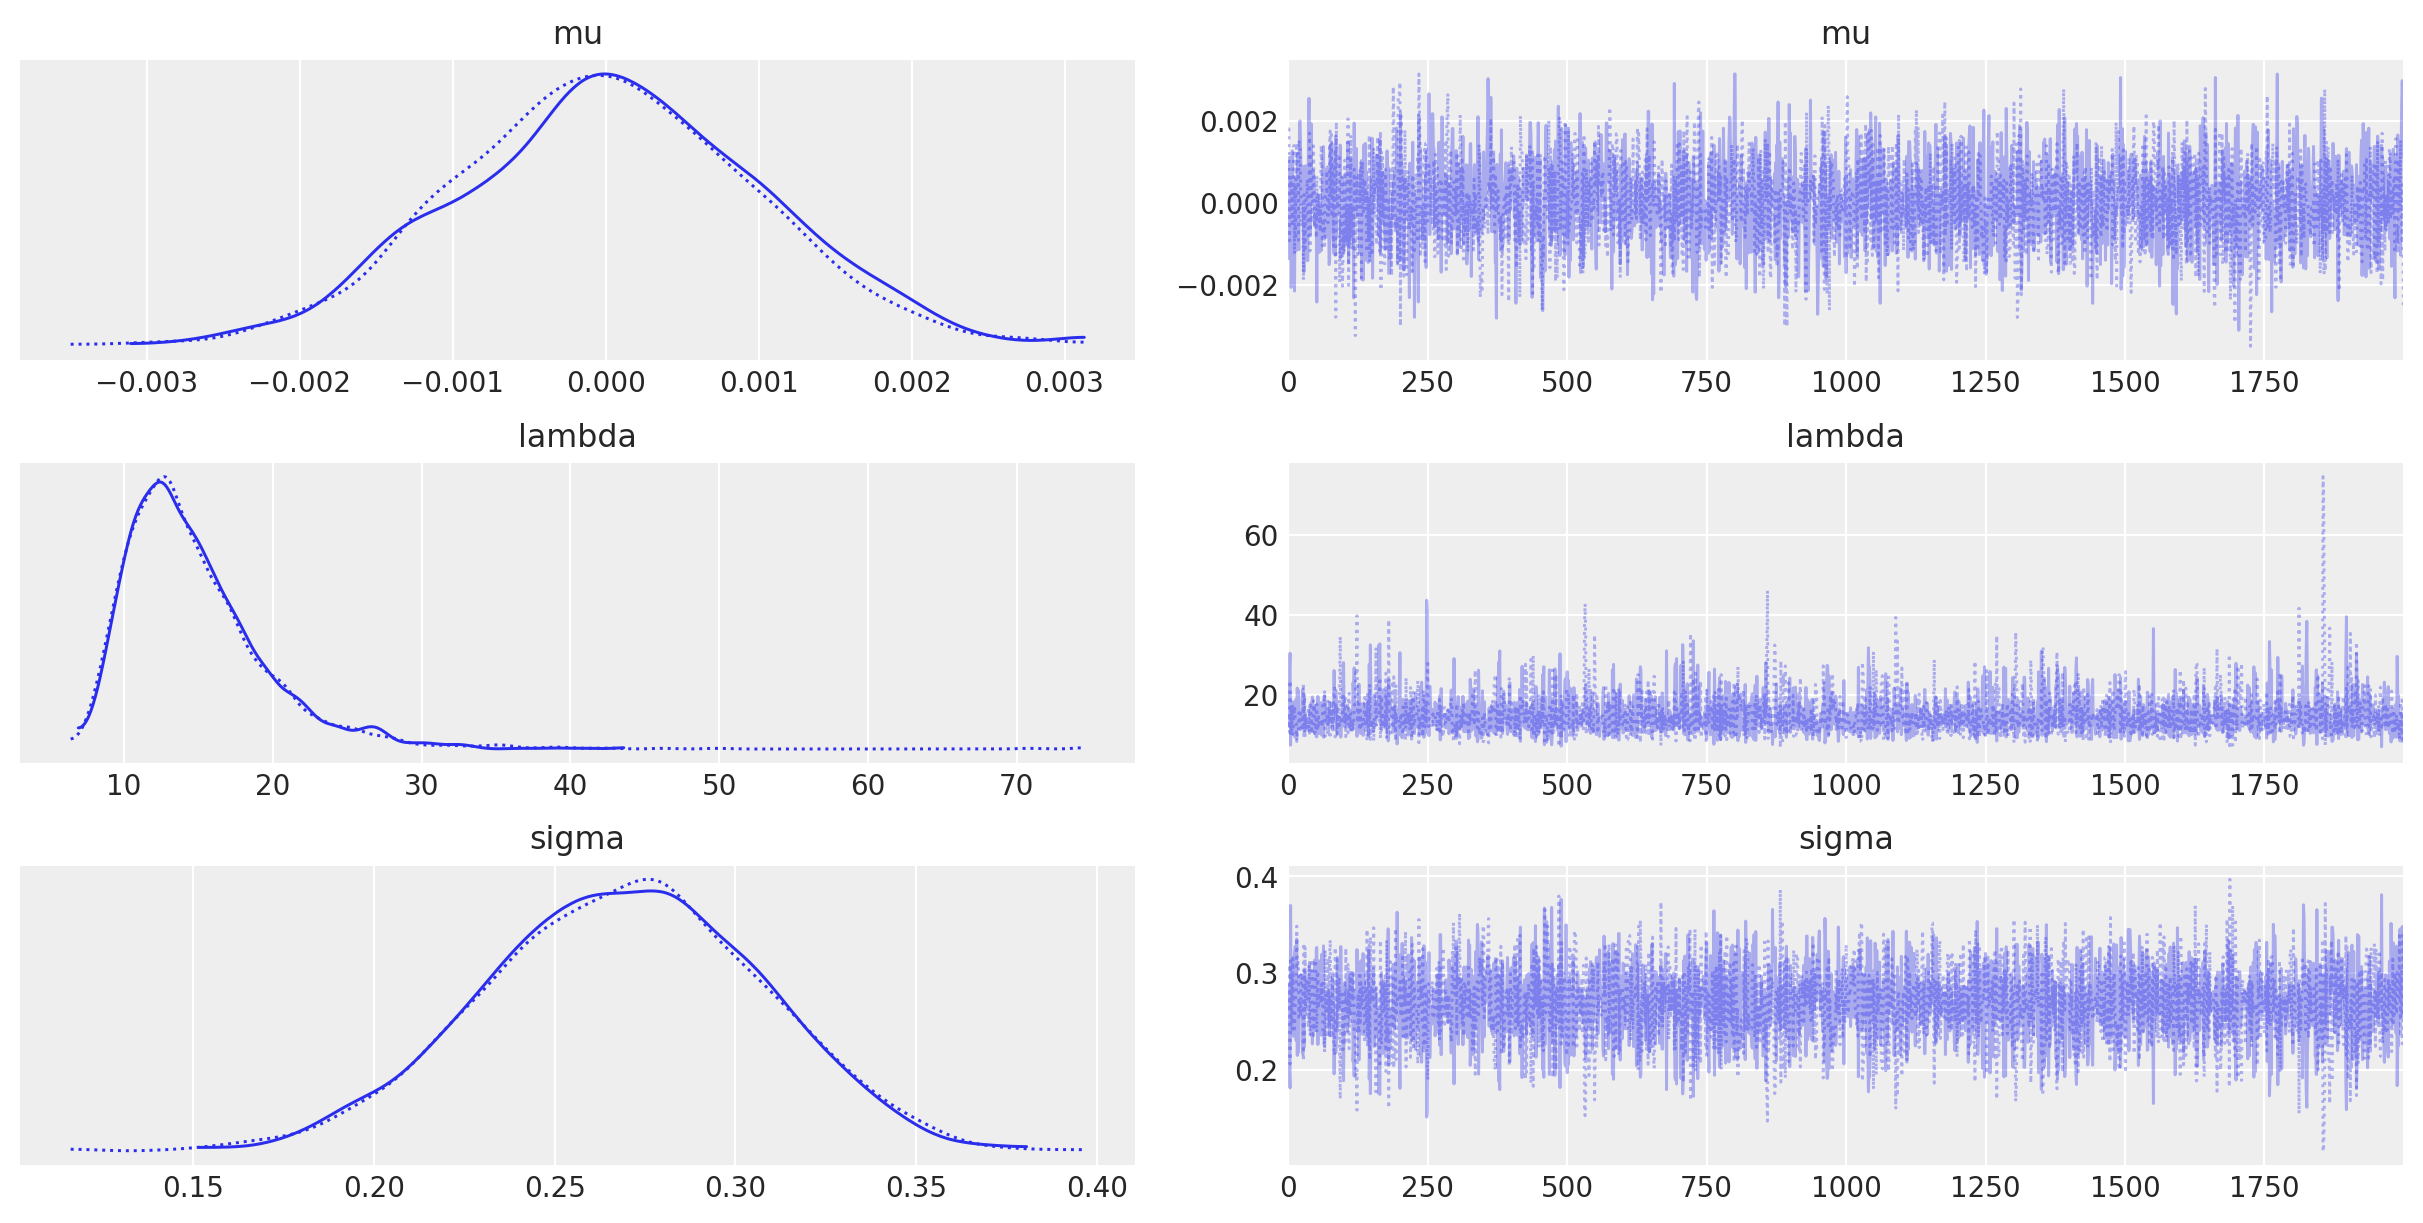

In [59]:
az.plot_trace(idata2)



# Problem 3: Repeated Measurement of IQ 

In this example, we consider how to estimate the IQ of a set of people, each of whom have done multiple IQ tests. 

The data are the measures xij for the i = 1, . . . , n people and their j = 1, . . . , m repeated test scores.


We assume that the differences in repeated test scores are distributed as Gaussian error terms with zero mean and unknown precision. The mean of the Gaussian of a person’s test scores corresponds to their latent true IQ. This will be different for each person. The standard deviation of the Gaussians corresponds to the accuracy of the testing instruments in measuring the one underlying IQ value. We assume this is the same for every person, since it is conceived as a property of the tests themselves.



The graphical model for this problem is shown in the Figure below. Because we know quite a bit about the IQ scale, it makes sense to set priors for the mean and standard deviation using this knowledge. Our first attempt to set priors (these are revisited in the exercises) simply assume the actual IQ values are equally likely to be anywhere between 0 and 300, and standard deviations are anywhere between 0 and 100.


![image](https://drive.google.com/uc?export=view&id=1w2N7h6nQtCamgPErRUWFNL3UaMq4odig)



## Exercises

**Exercise 3.0** Implement the graphical model shown above in PyMC3 
* Hint 1: use (nsubj, 1) as the shape for your mean parameter, in order to obtain one mean value for each subject 
* Hint 2: use PM.Deterministic to compute 1/sqrt(lambda) for your sigma parameter

**Exercise 3.1** Use the posterior distribution for each person’s μi to estimate their IQ. What can we say about the precision of the IQ test?

**Exercise 3.2** Now, use a more realistic prior assumption for the μi means. Theoretically, IQ distributions should have a mean of 100, and a standard deviation of 15. Make this change in your script, and re-run the inference. How do the estimates of IQ given by the means change? Why?

**Exercise 3.3** Repeat both of the above stages (i.e., using both priors on μi) with a new, but closely related data set that has scores of (94, 95, 96), (109, 110,111), and (154,155,156). How do the different prior assumptions affect IQ estimation for these data. Why does it not follow the same pattern as the previous data?

**Exercise 3.1**  

**Exercise 3.2**  

**Exercise 3.3**  

In [70]:
# Data
y = np.array([[90, 95, 100], [105, 110, 115], [150, 155, 160]]).T #3 measurements for 3 people 
ntest = 3
nsbj = 3

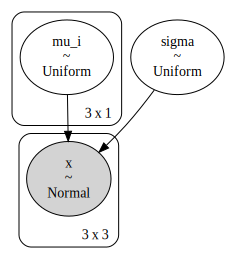

In [120]:
# Building the model 
iq_measurement_model = pm.Model()

with iq_measurement_model:
  #Exercise 3.0 Implement the graphical model shown above in PyMc3
  mu_i = pm.Uniform('mu_i', 0, 300, shape=(nsbj, 1))
  sigma = pm.Uniform('sigma', 0, 100)
  x_ij = pm.Normal('x', mu_i, sigma=sigma, observed=y, shape=(ntest, nsbj))

#Visualizing your model 
pm.model_graph.model_to_graphviz(iq_measurement_model)

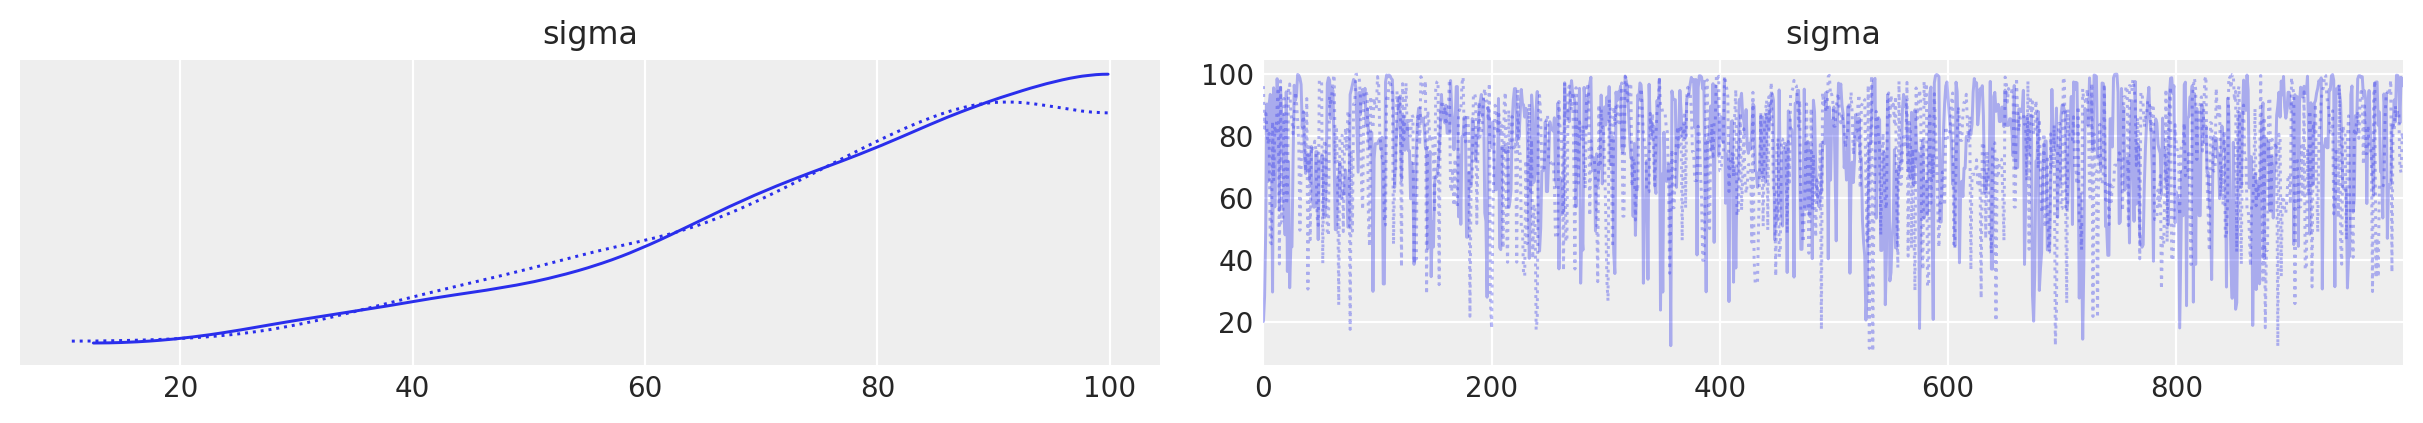

In [74]:
# perform inference 
with iq_measurement_model:
  idata3 = pm.sample(init="adapt_diag")
  
az.plot_trace(idata3);

In [75]:
az.summary(idata3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,74.807,19.049,39.158,99.95,0.633,0.468,786.0,854.0,1.0
